# **Data Understanding**

Dataset yang digunakan adalah dataset diabetes yang berisi informasi medis dari pasien, digunakan untuk memprediksi apakah seorang pasien mengidap diabetes atau tidak. Dataset ini sering digunakan untuk klasifikasi biner dalam konteks machine learning.

Sumber Dataset: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

Dataset ini memiliki 768 baris (pasien) dan 9 kolom, terdiri dari fitur-fitur numerik dan satu kolom target (label).

- **Pregnancies:** Jumlah kehamilan yang pernah dialami oleh pasien.
- **Glucose:** Kadar glukosa plasma.
- **BloodPressure:** Tekanan darah diastolik pasien (dalam satuan mm Hg).
- **SkinThickness:** Ketebalan lipatan kulit trisep (dalam satuan mm).
- **Insulin:** Jumlah insulin dalam serum.
- **BMI:** Indeks massa tubuh.
- **DiabetesPedigreeFunction:** Skor berdasarkan riwayat diabetes dalam keluarga (faktor genetik).
- **Age:** Usia pasien (dalam tahun).
- **Outcome:** Label target. Nilai 0 menunjukkan pasien tidak menderita diabetes, sedangkan nilai 1 menunjukkan pasien menderita diabetes.

## **Data Loading**

In [1]:
# import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Pada cell ini dilakukan proses import library untuk machine learning, yaitu:
- **NumPy:** untuk komputasi numerik dan array multidimensi.
- **Matplotlib dan Seaborn:** untuk membuat plot dan visualisasi data.
- **Pandas:** untuk manipulasi dan analisis data tabular (seperti DataFrame).
- **train_test_split:** Mengambil fungsi untuk membagi data menjadi set pelatihan dan pengujian dari Scikit-learn.
- **StandardScaler:** Mengambil kelas untuk melakukan standarisasi fitur dari Scikit-learn.
- **LogisticRegression:** Mengambil algoritma klasifikasi Logistic Regression dari Scikit-learn.
- **RandomForestClassifier:** Mengambil algoritma klasifikasi Random Forest dari Scikit-learn.
- **KNeighborsClassifier:** Mengambil algoritma klasifikasi K-Nearest Neighbors dari Scikit-learn.
- **accuracy_score, precision_score, recall_score, f1_score, confusion_matrix:** Mengambil metrik evaluasi model klasifikasi dari Scikit-learn.

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Terapan/diabetes.csv')

# Menampilkan keseluruhan dataset
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Diatas merupakan proses load dataset atau memuat dataset yang akan digunakan, yaitu diabetes.csv dan menampilkan isi keseluruhan data yang memiliki 768 baris dan 9 kolom.
Kita bisa melihat nilai-nilai spesifik untuk setiap fitur pada beberapa baris pertama dan terakhir. Misalnya:
- Pada baris pertama (indeks 0), seseorang memiliki 6 kehamilan, kadar glukosa 148, tekanan darah 72, ketebalan kulit 35, insulin 0, BMI 33.6, fungsi silsilah diabetes 0.627, usia 50, dan Outcome 1 (Menderita Diabetes).
- Pada baris terakhir (indeks 767), seseorang memiliki 1 kehamilan, kadar glukosa 93, tekanan darah 70, ketebalan kulit 31, insulin 0, BMI 30.4, fungsi silsilah diabetes 0.315, usia 23, dan Outcome 0 (Tidak Menderita Diabetes).

## **Exploratory Data Analysis (EDA)**

Pada tahap ini adalah proses awal dalam data science untuk memahami struktur, pola, dan anomali pada data sebelum membangun model. Tahapan EDA bertujuan untuk menemukan wawasan penting yang dapat memengaruhi strategi preprocessing atau pemodelan.

Berikut adalah tahapan proses pada EDA:

In [3]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 Informasi Setiap Kolom:

- **Nama Kolom:** Terdaftar nama-nama dari 9 kolom yang ada: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome.
- **Jumlah Non-Null:** Untuk setiap kolom, tertera 768 non-null. Ini adalah informasi yang sangat penting karena menunjukkan bahwa tidak ada nilai yang hilang (missing values) dalam dataset ini. Dengan kata lain, setiap sel dalam dataset memiliki nilai.
- **Tipe Data (Dtype):** Informasi tipe data untuk setiap kolom adalah sebagai berikut:
  - **int64:** Digunakan untuk bilangan bulat (integer). Kolom-kolom Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, dan Outcome memiliki tipe data ini.
  - **float64:** Digunakan untuk bilangan desimal (floating-point numbers). Kolom BMI dan DiabetesPedigreeFunction memiliki tipe data ini.

In [4]:
# Melihat Statistik Deskriptif untuk numerikal
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Statistik Deskriptif:
- **Jumlah Data:** Semua kolom punya 768 data.
- **Rata-rata:** Terlihat nilai tengah setiap kolom. Contohnya:   
  - Rata-rata jumlah kehamilan adalah sekitar 3.85.
  - Rata-rata kadar glukosa adalah sekitar 120.9.
- **Standard Deviation:** Mengukur seberapa tersebar nilai-nilai dalam setiap kolom dari nilai rata-ratanya. Standar deviasi yang lebih tinggi menunjukkan penyebaran data yang lebih luas. Contohnya, standar deviasi untuk Glucose (31.97) lebih tinggi daripada Pregnancies (3.37), menunjukkan variasi kadar glukosa yang lebih besar dibandingkan dengan jumlah kehamilan. Perhatikan juga standar deviasi yang sangat tinggi pada kolom Insulin (115.24), mengindikasikan variasi nilai insulin yang signifikan.
- **Nilai Minimum:** Beberapa kolom punya nilai 0, perlu dicek validitasnya.
- **25% (First Quartile)**: Nilai di mana 25% data berada di bawahnya. Contohnya, 25% individu memiliki kadar glukosa di bawah 99.
- **50% (Median atau Second Quartile):** Nilai tengah dataset. 50% data berada di bawah dan 50% data berada di atas nilai ini. Perhatikan perbedaan antara mean dan median untuk beberapa kolom. Misalnya, untuk Insulin, mean (79.8) jauh lebih tinggi dari median (30.5), yang mengindikasikan adanya outlier (nilai ekstrem) yang menarik rata-rata ke atas.
- **75% (Third Quartile):** Nilai di mana 75% data berada di bawahnya. Contohnya, 75% individu memiliki usia di bawah 41 tahun.
- **Nilai Maksimum:** Ada nilai ekstrem (outlier) di beberapa kolom, terutama kolom Insulin.
- **Outcome:** Sekitar 35% datanya positif.

### Menangani Missing Value dan Outliers

In [5]:
# Mengecek missing value
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Hasil dari pengecekan missing value diatas menunjukan bahwa tidak ada nilai null atau hilang dalam dataset untuk semua kolom yang diperiksa. Sehingga kita tidak perlu melakukan penanganan untuk missing value.

In [6]:
# Melihat jumlah data duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


Pada tahap ini adalah pengecekan jumlah data duplikat, bisa kita lihat bahwa tidak ada data duplikat sehingga bisa melanjutkan ke tahap selanjutnya yaitu mengecek distribusi fitur dan outliers.

In [7]:
# Membuat dataframe tanpa kolom 'Outcome'
df_features = df.drop(columns=['Outcome'])

Sebelum masuk ka tahap distribusi, kita perlu memisahkan atau menghapus kolom 'Outcome' untuk pengecekan distribusi fitur

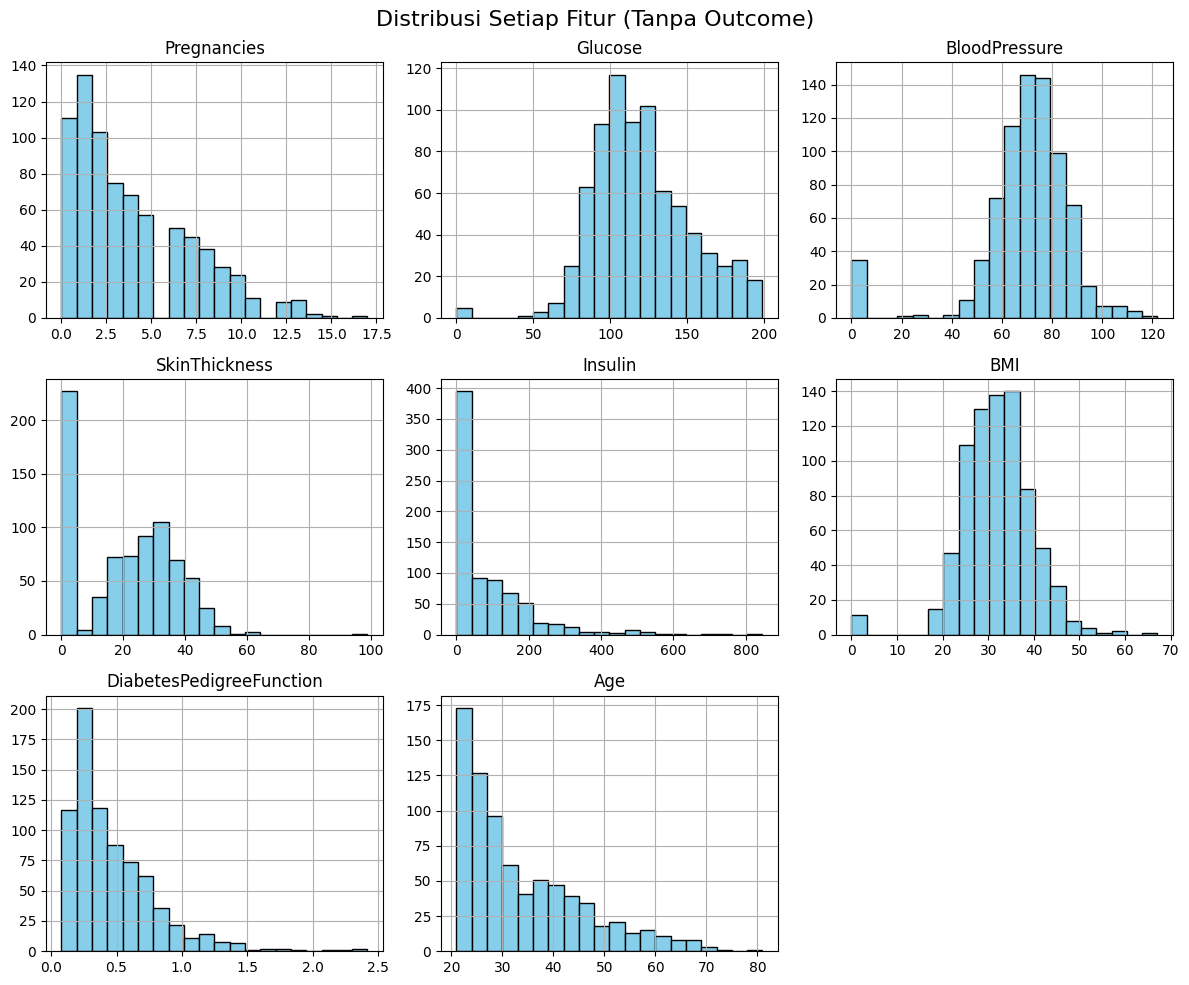

In [8]:
# Distribusi masing-masing fitur (Tanpa Outcome)
df_features.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Setiap Fitur (Tanpa Outcome)', fontsize=16)
plt.tight_layout()
plt.show()

Distribusi Fitur (Histogram):
- **Pregnancies dan DiabetesPedigreeFunction:** Cenderung right-skewed, dengan sebagian besar nilai berada di sisi kiri dan ekor yang memanjang ke kanan.
- **Glucose, BloodPressure, BMI, dan Age:** Distribusinya tampak lebih mendekati distribusi normal, meskipun dengan sedikit skewness pada beberapa fitur.
- **SkinThickness dan Insulin:** Sangat right-skewed, dengan banyak nilai terkonsentrasi di nilai rendah dan beberapa nilai ekstrem yang tinggi.

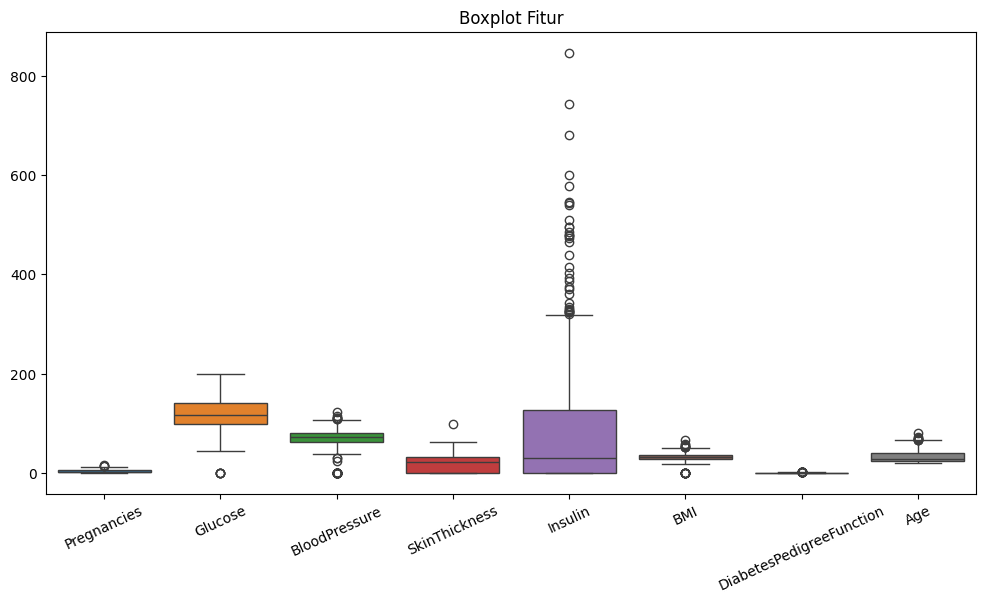

In [9]:
# Boxplot untuk melihat outlier (Tanpa Outcome)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_features)
plt.title("Boxplot Fitur")
plt.xticks(rotation=25)
plt.show()

Boxplot tiap fitur:
- **Identifikasi Outlier yang Signifikan:** Visualisasi boxplot dengan jelas memperlihatkan keberadaan outlier, terutama pada fitur Insulin yang memiliki sebaran nilai ekstrem yang cukup jauh. Fitur SkinThickness juga menunjukkan beberapa nilai di luar batas normal. Meskipun demikian, mengingat tujuan proyek ini adalah mendeteksi dini diabetes, keberadaan nilai-nilai ekstrem ini dipertahankan. Nilai-nilai ini berpotensi merepresentasikan kondisi medis yang valid dan signifikan, seperti kadar insulin yang sangat tinggi pada pasien dengan resistensi insulin atau diabetes tipe 2. Penghapusan outlier berisiko menghilangkan informasi penting untuk identifikasi kasus diabetes.
- **Variasi Rentang Data yang Perlu Diperhatikan:** Boxplot juga mengindikasikan adanya perbedaan rentang data yang cukup besar antar fitur. Misalnya, fitur Insulin memiliki skala nilai yang jauh lebih tinggi dibandingkan fitur DiabetesPedigreeFunction. Variasi rentang ini menjadi pertimbangan penting untuk tahap pemodelan machine learning. Jika tidak ditangani, model dapat menjadi bias terhadap fitur dengan skala yang lebih besar. Oleh karena itu, normalisasi atau standarisasi fitur kemungkinan akan diperlukan untuk memastikan semua fitur berkontribusi secara adil dalam membangun model prediksi diabetes yang akurat.

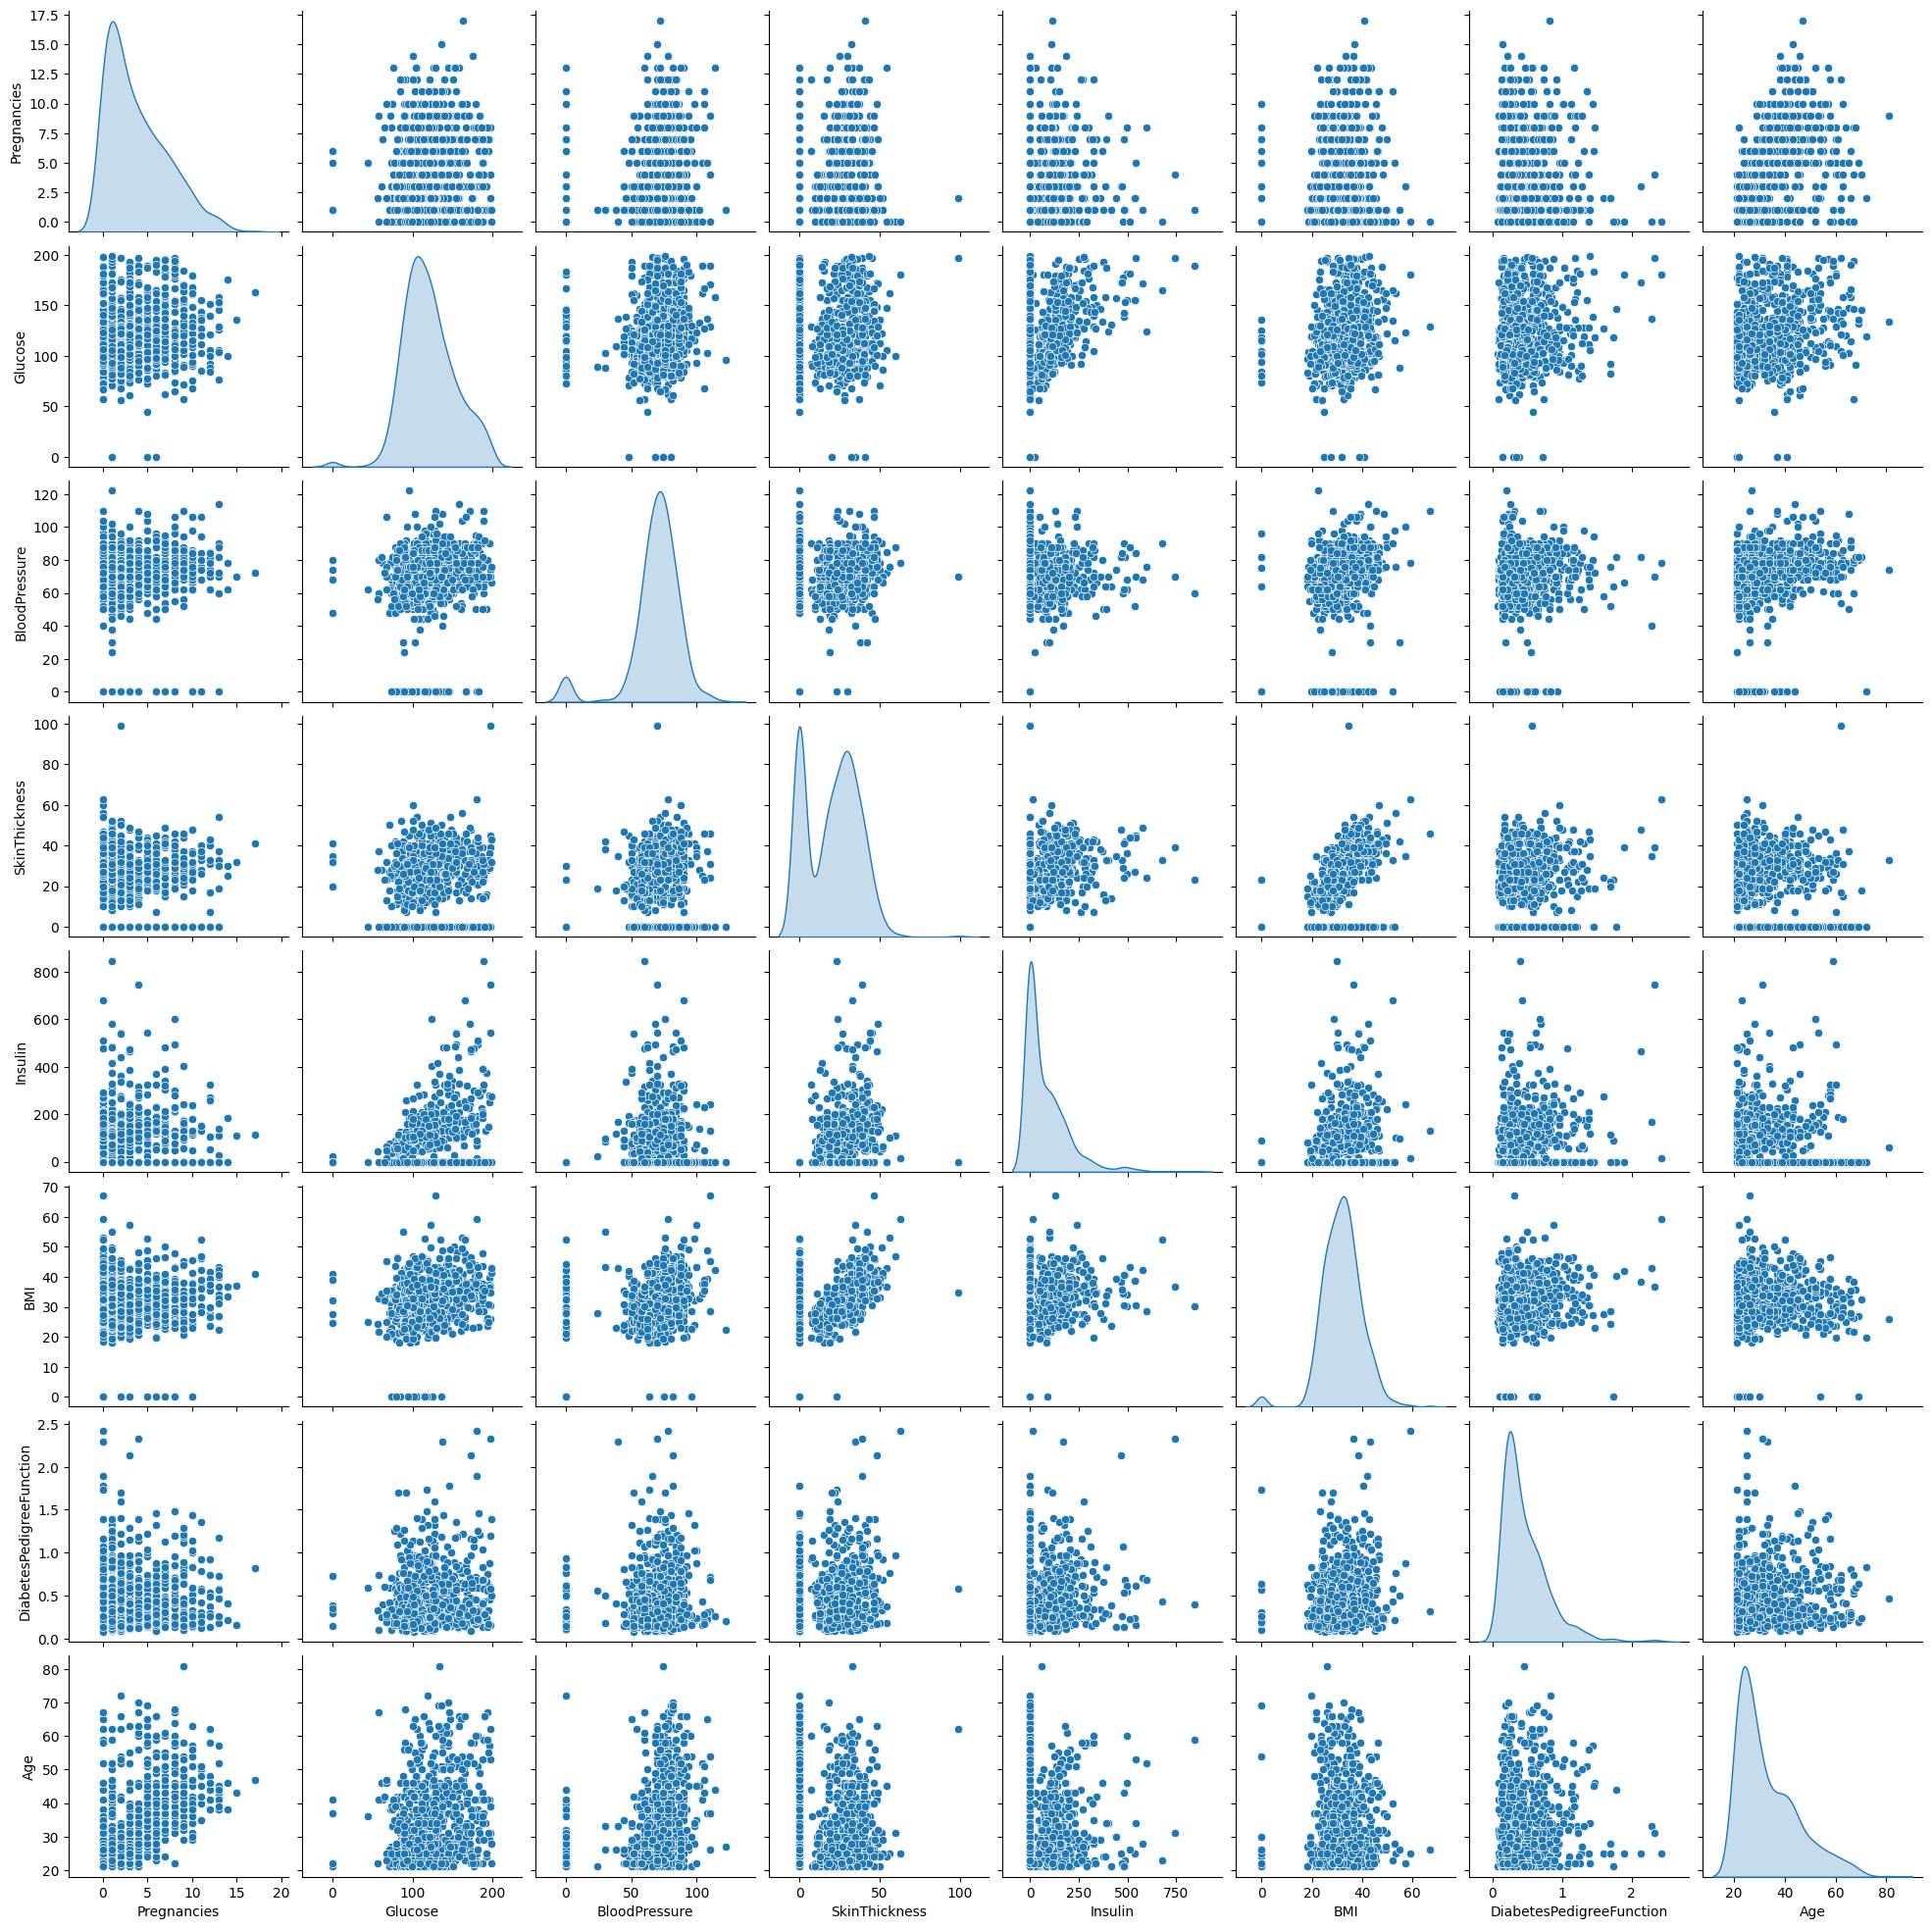

In [10]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_features, diag_kind = 'kde')

Korelasi Antar Fitur:

- Glucose dan BMI menunjukkan hubungan positif: semakin tinggi kadar glukosa, cenderung BMI juga meningkat.

- Pregnancies dan Age menunjukkan hubungan positif: usia yang lebih tua cenderung memiliki jumlah kehamilan lebih banyak.

- BMI vs Insulin dan Glucose vs Insulin juga menunjukkan tren naik, meskipun dengan sebaran yang longgar.

- Banyak pasangan fitur menunjukkan pola acak (misalnya, SkinThickness vs BloodPressure), menunjukkan tidak ada korelasi linear yang jelas.

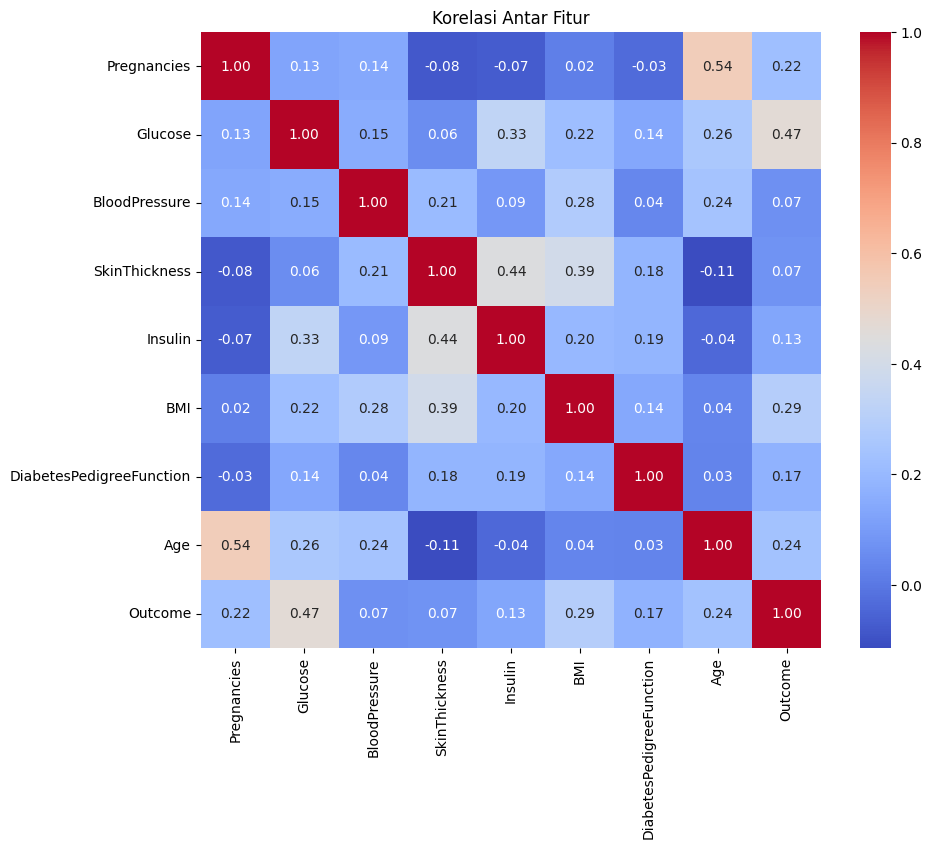

In [11]:
# Heatmap Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

Heatmap Korelasi antar fitur:
- Glucose (0.47): Korelasi positif terkuat dengan Outcome. Artinya, semakin tinggi kadar glukosa, semakin besar kemungkinan individu terkena diabetes.

- BMI (0.29): Korelasi sedang, menunjukkan pengaruh obesitas terhadap risiko diabetes.

- Age (0.24) dan Pregnancies (0.22): Semakin tua usia dan semakin banyak kehamilan, sedikit meningkatkan risiko.

- DiabetesPedigreeFunction (0.17): Juga memberi kontribusi, meski kecil.

# **Data Preparation**

Pada tahap ini adalah proses sistematis untuk mengubah data mentah menjadi bentuk yang bersih, konsisten, dan siap digunakan dalam pemodelan machine learning. Tahap ini dilakukan setelah EDA (Exploratory Data Analysis) dan sebelum pelatihan model. Banyak kasus menunjukkan bahwa model yang bagus tidak akan memberikan hasil optimal jika data yang digunakan tidak dipersiapkan dengan baik. Dari hasil EDA, kita bisa melihat apa saja yang perlu dilakukan selanjutnya agar model optimal yaitu seperti normalisasi dan split data.

In [12]:
# Normalisasi data (Standardisasi)
scaler = StandardScaler()

# Normalisasi fitur yang diperlukan, menggunakan dataframe tanpa kolom Outcome yaitu df_features
scaled_features = scaler.fit_transform(df_features)

# Membuat dataframe baru setelah normalisasi
scaled_df = pd.DataFrame(scaled_features, columns=df_features.columns)

# Menggabungkan kolom target 'Outcome' ke dataframe yang sudah di normalisasi
scaled_df['Outcome'] = df['Outcome']

Normalisasi Data:
- Standardisasi adalah teknik untuk mengubah skala fitur-fitur dalam dataset sehingga memiliki rata-rata (mean) sebesar 0 dan deviasi standar (standard deviation) sebesar 1.
- Melakukan normalisasi pada dataframe tanpa kolom 'Outcome' atau hanya melakukan normalisasi pada kolom input.
- Membuat dataframe baru setelah normalisasi dan menggabungkan kolom 'Outcome' ke dataframe yang sudah dinormalisasi.

In [13]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Fitur-fitur numerik dalam dataset (Pregnancies hingga Age) telah berhasil distandardisasi, yang ditunjukkan oleh nilai-nilai yang sekarang memiliki rentang di sekitar nol dan tidak lagi mencerminkan skala aslinya. Hal ini diperlukan agar algoritma machine learning tidak bias terhadap fitur dengan skala yang lebih besar. Untuk kolom 'Outcome' tetap berisi nilai asli (0 dan 1) karena kolom tersebut merupakan variabel target.

In [14]:
# Memisahkan Data menjadi Training dan Test Set
X = scaled_df.drop('Outcome', axis=1)  # Fitur
y = scaled_df['Outcome']  # Target

Memisahkan fitur (X) dan target (y) dari dataframe untuk melanjutkan ke tahap modeling dan evaluasi model.

In [15]:
# Split data menjadi 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Membagi data menjadi `70%` data latih dan `30%` data uji, data latih digunakan untuk melatih atau membangun model dan data uji digunakan untuk mengevaluasi model yang sudah dibangun. Ketika model diuji dengan data yang belum pernah dilihat atau dilatih sebelumnya, model bisa memberikan gambaran yang akurat.

In [16]:
# Menampilkan ukuran data latih dan data uji
print(f"Ukuran data latih: {X_train.shape[0]} | Ukuran data uji: {X_test.shape[0]}")

Ukuran data latih: 537 | Ukuran data uji: 231


Melihat jumlah data pada data latih dan data uji yang sudah dibagi sebelumnya dan memastikan sampel sudah sesuai.

# **Modeling**

Tahap ini adalah memilih dan melatih model machine learning untuk masalah terkait klasifikasi (dalam kasus ini, memprediksi apakah seseorang memiliki diabetes atau tidak) berdasarkan input di dataset.

**Memilih Model yang Akan Digunakan**

Disini saya menggunakan lebih dari 1 model untuk mencari model yang terbaik untuk mendeteksi diabetes, antara lain:
1. Logistic Regression: Interpretasi model relatif mudah (kita bisa melihat koefisien fitur), efisien secara komputasi, dan bekerja baik untuk masalah klasifikasi linear.
2. Support Vector Machine: Memaksimalkan margin antar kelas, SVM cenderung lebih generalize dibanding model lain, terutama jika parameter seperti C dan gamma disetel dengan baik.
3. Random Forest: Lebih tahan terhadap outlier dalam data dibandingkan beberapa model lain, Kuat terhadap overfitting, dapat menangani data non-linear dan interaksi fitur dengan baik, memberikan feature importance.
4. K-Nearest Neighbors (KNN): Mudah diimplementasikan, tidak membuat asumsi tentang distribusi data.

In [17]:
# Membuat Model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

Menginisialisasi model yang akan digunakan yaitu Logistic Regression,Support Vector Machine, Random Forest, dan K-Nearest Neighbbors. Untuk Logistic Regression, SVM, dan Random Forest parameter `random_state=42` untuk produktibilitas, dan KNN tidak karena bersifat deterministik data dan berdasarkan jarak terdekatnya.

In [18]:
# Inisialisasi untuk menyimpan hasil
evaluation_results = []
con_metrics = {}

Membuat directory penyimpanan hasil evaluasi (Accuracy, Precision, recall, F1-Score) di `evaluation_result` dan confusion matrix di `con_metrics`

In [19]:
# Latih dan evaluasi model
for i, (name, model) in enumerate(models.items()):
    # Latih model
    model.fit(X_train, y_train)
    # Prediksi
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    cm = confusion_matrix(y_test, y_pred)

    con_metrics[name] = cm
    evaluation_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

Setelah membagi data untuk data latih dan data uji, model akan dilatih menggunakan data yang sudah dibagi tersebut yaitu X_train dan y_train.

## **Evaluasi Model**

In [20]:
# Buat DataFrame
results_df = pd.DataFrame(evaluation_results)

# Menampilkan Tabel Hasil
results_df.set_index("Model", inplace=True)
print("Evaluasi Metrik Setiap Model:")
display(results_df.round(6))

Evaluasi Metrik Setiap Model:


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression,0.735931,0.617284,0.6250,0.621118
Support Vector Machine,0.748918,0.648649,0.6000,0.623377
Random Forest,0.757576,0.646341,0.6625,0.654321
K-Nearest Neighbors,0.692641,0.561644,0.5125,0.535948


**Evaluasi Model:**

Model diuji dengan data uji X_test dengan menampilkan hasil seperti diatas:
- Accuracy: Proporsi total prediksi yang benar dari seluruh prediksi.
- Precision: Proporsi prediksi positif yang sebenarnya positif.
- Recall: Proporsi aktual positif yang berhasil diprediksi sebagai positif.
- F1-Score: Rata-rata harmonik dari precision dan recall. Memberikan ukuran tunggal yang menyeimbangkan antara precision dan recall.

Setelah itu, ketiga model akan dibuat visualiasi sebagai perbandingan diantara ketiga model tersebut.

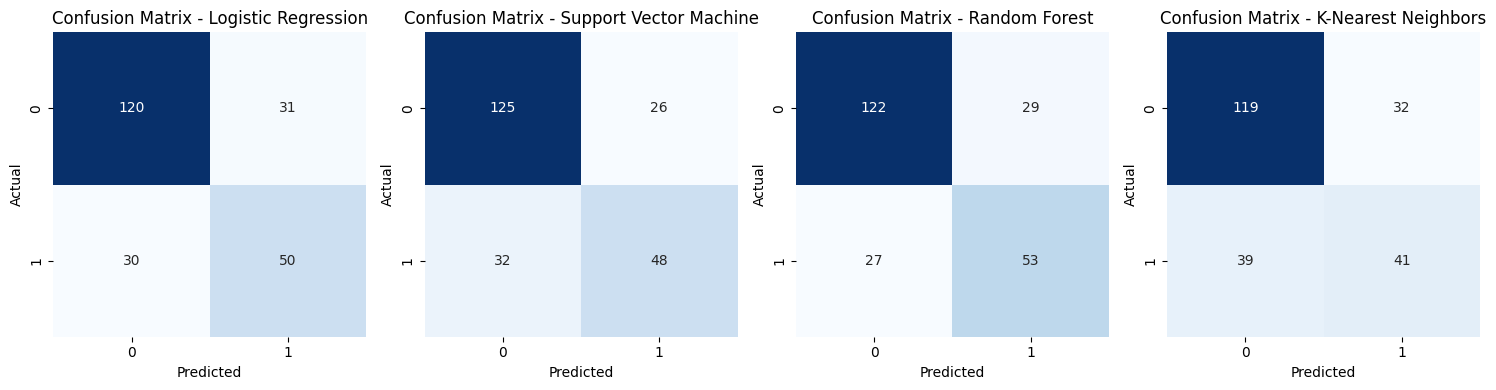

In [22]:
# Menampilkan confussion matriks tiap model
fig, axes = plt.subplots(1, 4, figsize=(15, 4))  # 1 baris, 3 kolom untuk 3 model

for i, (name, cm) in enumerate(con_metrics.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

Hasil Visualisasi dari confussion matriks pada tiap model untuk melihat prediksi yang dibuat oleh model dengan kelas sebenarnya dari data pengujian.
- Random Forest memiliki jumlah True Negatives dan True Positives tertinggi, serta jumlah False Positives dan False Negatives terendah. Ini secara visual mengkonfirmasi kinerja yang lebih baik.
- SVM Cocok jika penting untuk menghindari false alarm (false positive), namun perlu ditingkatkan lagi untuk mendeteksi kasus positif secara lebih akurat.
- Logistic Regression menunjukkan kinerja yang lebih baik dari KNN, tetapi tidak sebaik Random Forest.
- KNN memiliki jumlah False Negatives yang cukup tinggi, menunjukkan bahwa model ini cenderung gagal mengidentifikasi beberapa pasien yang sebenarnya memiliki diabetes. Presisinya juga paling rendah, menandakan lebih banyak False Positives.

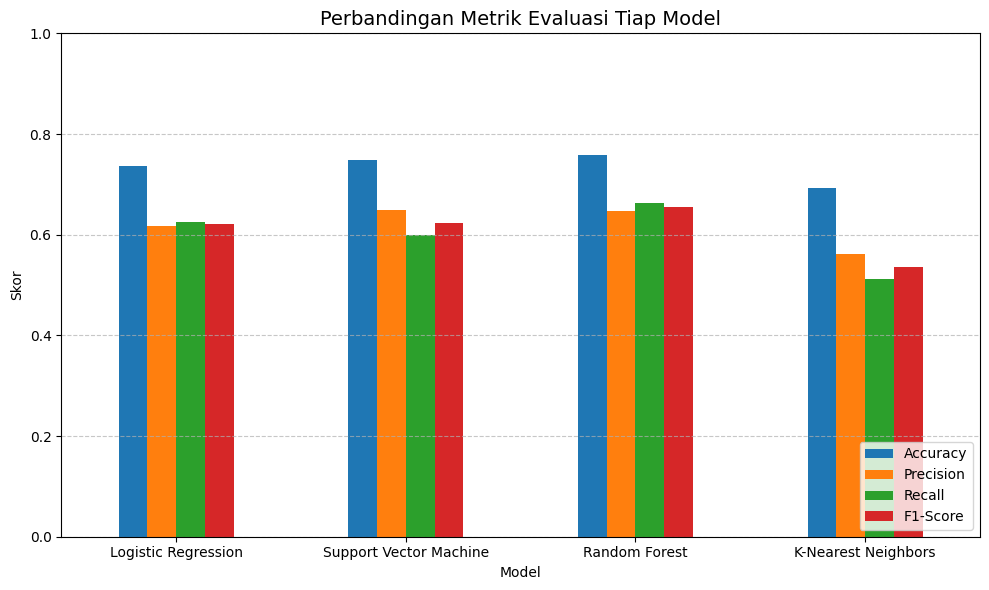

In [23]:
# Plot perbandingan metrik
results_df.plot(kind="bar", figsize=(10, 6))

plt.title("Perbandingan Metrik Evaluasi Tiap Model", fontsize=14)
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Hasil visualisasi plot grafik batang untuk melihat perbandingan Accuracy, Precision, Recall, dan F1-Score pada tiap modelnya.
- Random Forest secara konsisten memiliki nilai tertinggi untuk akurasi, presisi, recall, dan F1-score.
- SVM berada di posisi kedua dari accuracy dan beberapa metrik lainnya.
- Logistic Regression berada di posisi ketiga untuk semua metrik.
- KNN memiliki kinerja yang paling rendah di antara ketiga model untuk semua metrik.

**Interpretasi Hasil:**

Interpretasi hasil evaluasi model (Logistic Regression, Support Vector Machine, Random Forest, dan K-Nearest Neighbors) berdasarkan metrik akurasi, presisi, recall, dan F1-score adalah sebagai berikut:

1. **Logistic Regression**
    - Accuracy: 0.7359
    - Precision: 0.6173
    - Recall: 0.6250
    - F1-Score: 0.6211

2. ** Support Vector Machine**
    - Accuracy: 0.7489
    - Precision: 0.6486
    - Recall: 0.6000
    - F1-Score: 0.6233

3. **Random Forest**
    - `Accuracy: 0.7576`
    - Precision: 0.6463
    - Recall: 0.6625
    - F1-Score: 0.6543

4. **K-Nearest Neighbors (KNN)**
    - Accuracy: 0.6926
    - Precision: 0.5616
    - Recall: 0.5125
    - F1-Score: 0.5360

Berdasarkan metrik evaluasi ini:

- **Random Forest** menunjukkan kinerja yang paling konsisten dan umumnya tertinggi di antara keempat model dalam hal Accuracy, Precision, Recall, dan F1-Score. Ini menjadikannya model yang paling menjanjikan berdasarkan metrik-metrik ini.
- Logistic Regression dan Support Vector Machine memiliki kinerja yang cukup mirip dan berada di bawah Random Forest. Keduanya menunjukkan Accuracy dan Precision yang lebih tinggi dibandingkan KNN, namun Recall dan F1-Score mereka bervariasi tergantung pada model dan mungkin perlu dipertimbangkan lebih lanjut berdasarkan prioritas metrik.
- K-Nearest Neighbors secara umum menunjukkan kinerja yang paling rendah di antara keempat model untuk semua metrik evaluasi. Ini mengindikasikan bahwa KNN mungkin kurang cocok untuk tugas klasifikasi pada dataset ini dibandingkan dengan model lainnya.


**Kesimpulan:**

Berdasarkan hasil evaluasi tersebut, **Model Random Forest menunjukkan kinerja terbaik** secara keseluruhan dalam memprediksi diabetes pada dataset ini dibandingkan dengan Logistic Regression, SVM dan K-Nearest Neighbors (KNN).
Berikut adalah poin-poin utama yang mendukung kesimpulan ini:
- **Akurasi Tertinggi:** Random Forest memiliki akurasi tertinggi, menunjukkan proporsi prediksi yang benar lebih banyak dibandingkan model lain.
- **Keseimbangan Presisi dan Recall Terbaik:** Random Forest mencapai nilai F1-score tertinggi, yang mengindikasikan keseimbangan yang baik antara kemampuan model untuk secara akurat memprediksi kasus positif (presisi) dan kemampuannya untuk mengidentifikasi semua kasus positif yang sebenarnya ada (recall).
- **Kinerja Confusion Matrix Terbaik:** Confusion matrix untuk Random Forest menunjukkan jumlah True Positives dan True Negatives tertinggi, serta jumlah False Positives dan False Negatives terendah, mengindikasikan kesalahan prediksi paling sedikit untuk kedua kelas.